![MSE Logo](https://moodle.msengineering.ch/pluginfile.php/1/core_admin/logo/0x150/1643104191/logo-mse.png)

# AnTeDe Lab 6: Applications of word2vec
## Objective
* Compare pre-trained word2vec models with models trained on your workstation, on word similarity and analogy tasks.	

## General instructions
* You can do the lab alone or in groups of two students.
* Please write the required code, and also reply explicitly to the questions, as Python comments in code cells or text in markdown cells. 
* To submit your practical work, please make sure all cells are executed, then save and zip the notebook, and submit it as homework on [Moodle](https://moodle.msengineering.ch/course/view.php?id=1869).
* Useful documentation: [section on word2vec in Gensim](https://radimrehurek.com/gensim/models/word2vec.html) as well as the [section on KeyedVectors in Gensim](https://radimrehurek.com/gensim/models/keyedvectors.html).
* Training can be done locally if you have at least 16 GB of memory (it takes minutes, not hours), or using [Google Colab](https://colab.research.google.com/).

Students:
Adrian Willi adrian.willi@hslu.ch
Florian Bär florian.baer@hslu.ch

## 1. Testing a word2vec model trained on Google News
a. Install Gensim the latest version of Gensim, for instance by running in your Conda environment `pip install --upgrade gensim`. 

In [4]:
# If you want to install from here, run the command ('!' indicates a command for the shell)
#!pip install --upgrade gensim
#!pip install nltk jupyter-notebook

# Please run the following verification:
!pip show gensim

Name: gensim
Version: 4.1.2
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: /home/florian/anaconda3/envs/MSE-AnTeDe/lib/python3.10/site-packages
Requires: scipy, smart-open, numpy
Required-by: 


In [9]:
import gensim, os
from gensim import downloader
# help(gensim.models.word2vec) # check if you are curious, but don't include output in the final notebook

In [7]:
# Download the model file from Gensim, for the first time only
# gensim.downloader.load("word2vec-google-news-300", return_path = True)
# We can assign the returned value to a model, but it is twice larger than needed.

b. Where is the model stored on your computer?  What is the size of the file?  Please store the absolute path in a variable called `path_to_model_file`, and use `os.path.getsize` to display the size converted in gigabytes with two decimals.

In [30]:
# Please write your Python code below and execute it.
path_to_model_file = '/home/florian/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz'
size_in_bytes = os.path.getsize(path_to_model_file)
size_in_gb = size_in_bytes/(1024**3)
print(f'{size_in_gb:.2f} GB')

1.62 GB


In [31]:
# Load the model into the notebook:
from gensim.models import KeyedVectors
wv_model = gensim.models.KeyedVectors.load_word2vec_format(path_to_model_file, binary=True)  # C bin format

c. What is the memory size of the process corresponding to this notebook?  Please simply write the value you obtain from any OS-specific utility that you wish to use for this purpose.

In [35]:
print('4.2 GB')

4.2 GB


d. What is the size of the vocabulary of this model?  (I.e., how many words does it know?)

In [44]:
# Please write the Python code needed to display the vocabulary size and execute it.
print(len(wv_model.vectors))
# or
print(len(wv_model))

3000000
3000000


e. Compare the vocabulary size with the number of words in an English dictionary.  How do you explain the difference?  Illustrate your explanation by showing at least 5 words which are in the model's vocabulary, and 2 that are not.

According to wikipedia [Wikipedia](https://en.wikipedia.org/wiki/List_of_dictionaries_by_number_of_words) the english language has around 470,000 Words.
**Words that are available are:**
- work
- fun
- school
- computer
- english

**Words not in the dict are:**
- covid - new word appeared 2020
- woofits  - "A hangover."

I searched by intention for old words [Nice old words](https://www.businessinsider.com/best-old-english-words-that-no-longer-exist-2017-3?r=US&IR=T) or new words appeared recently

In [62]:
# Please write your Python code below and execute it.
# words in dict
print('work' in wv_model)
print('fun' in wv_model)
print('school' in wv_model)
print('computer' in wv_model)
print('english' in wv_model)


# words not in dict
print('covid' in wv_model)
print('woofits' in wv_model)


True
True
True
True
True
False
False


In [ ]:
print(wv_model['computer'])

f. Determine the size of the vector space for this word2vec model, i.e. the dimensionality of the embedding space, using two methods: either using the vector of a word from the vocabulary, or directly using the shape of the model.

In [65]:
# Please write your Python code below and execute it.
print(len(wv_model['computer']))
# or
print(wv_model.vector_size)

300
300


## 2. Using word2vec trained on Google News for word similarity
In this section, you are going to use word vectors to compute (cosine) similarity between words (use the [KeyedVectors](https://radimrehurek.com/gensim/models/keyedvectors.html) documentation).  You will experiment with three tasks: (a) rank a small number of word pairs by decreasing similarity; (b) test the model on the WordSimilarity-353 set; (c) test the model on the analogy task.

a. Sort the word pairs given below by decreasing similarity (i.e. most similar first).  Display also the similarity value found by word2vec, with 2 decimals.

In [74]:
test_pairs = [('car','automobile'), ('car', 'bike'), ('car', 'oil'), ('car', 'pedal'), 
              ('bike', 'pedal'), ('bike', 'bicycle'), ('oil', 'gas'), ('car', 'bus')]
# Please write your Python code below and execute it.
similarities = [(wv_model.similarity(tuple[0], tuple[1]), tuple) for tuple in test_pairs]
similarities.sort(key=lambda x: x[0], reverse=True)
print(similarities)

[(0.8521309, ('bike', 'bicycle')), (0.71059805, ('oil', 'gas')), (0.58541536, ('car', 'bike')), (0.5838368, ('car', 'automobile')), (0.4693371, ('car', 'bus')), (0.4666497, ('bike', 'pedal')), (0.29297784, ('car', 'pedal')), (0.14874084, ('car', 'oil'))]


b. What are the five closest words to *car* in the whole vocabulary and their similarity values with *car*? 

In [78]:
wv_model.init_sims(replace=True) # run this to avoid memory footprint doubling with the first call
# of "most_similar" (which caches unit vectors without replacement, unless told explicitly to do so).
# Will have the same effect on evaluate_word_analogies below
# Please write your Python code below and execute it.
print(wv_model.most_similar('car', topn=5))

/tmp/ipykernel_34863/3888414087.py:1: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  wv_model.init_sims(replace=True) # run this to avoid memory footprint doubling with the first call


[('vehicle', 0.7821096181869507), ('cars', 0.7423830032348633), ('SUV', 0.7160962820053101), ('minivan', 0.6907036304473877), ('truck', 0.6735789775848389)]


c. Using the [KeyedVectors](https://radimrehurek.com/gensim/models/keyedvectors.html) documentation, evaluate the model on the WordSimilarity-353 task.  This compares similarities assigned to word pairs by word2vec with those assigned by humans.  Please display only the Pearson Correlation Coefficient, with two decimals.

In [87]:
# Please write your Python code below and execute it.
from gensim.test.utils import datapath
pearson, spearman, oov_ratio = wv_model.evaluate_word_pairs(datapath('wordsim353.tsv'))
print(f'Pearson {pearson[0]:2f} with p-value {pearson[1]}')

Pearson 0.623877 with p-value 1.7963285234267404e-39


d. Using the [KeyedVectors](https://radimrehurek.com/gensim/models/keyedvectors.html) documentation, evaluate the model on the Analogy Tasks (e.g., "*What is to Thailand what Athens is to Greece?*"). The task is specified in a data file called `questions-words.txt`.  Note: this takes around 5 minutes.  Store the output in a variable for future use.

In [88]:
# Please write your Python code below and execute it.
analogy_scores = wv_model.evaluate_word_analogies(datapath('questions-words.txt'))

e. Using the output above, Please display the accuracy (number of correctly solved analogies), and then pick four categories of your choice, and display for each of them the accuracy, a correctly-solved analogy, and an incorrectly-solved one.  How many analogy tasks are there in total?

In [163]:
# Please write your Python code below and execute it.
acc = analogy_scores[0]
print(f'Accuracy: {acc}')
# last element is total accuracy - so just count them together
print(f"Total of {(len(analogy_scores[1][-1]['correct'])+len(analogy_scores[1][-1]['incorrect']))}")

Accuracy: 0.7401448525607863
Total of 19330


f. Create a short file called `questions-words-NAME.txt` (where `NAME` is your name) with several new test items for analogies (at least 10 lines), following the template of `questions-words.txt`.  For instance, from the three following pairs: (eye, see), (ear, listen), and (foot, walk) you can create 12 test items, varying the item that the system must predict and the initial items.  What is the accuracy of the model on your test set?

In [118]:
# Please write your Python code below and execute it.
analogy_scores_self = wv_model.evaluate_word_analogies('questions-words-florian-baer.txt')
print(analogy_scores_self[0])
analogy_scores_self = wv_model.evaluate_word_analogies('questions-words-florian-baer2.txt')
print(analogy_scores_self[0])
analogy_scores_self = wv_model.evaluate_word_analogies('questions-words-florian-baer3.txt')
print(analogy_scores_self[0])
# does not work too good

0.16666666666666666
0.16666666666666666
0.08333333333333333


## 3. Training a word2vec model from scratch
In this section, you will first use `gensim.downloader` to retrieve a 100-million character corpus ('text8' excerpt from Wikipedia).  You will use this data to train your own word2vec model.  Then, you will test the model on word similarity and analogies tasks.
* [documentation of gensim.downloader](https://radimrehurek.com/gensim/downloader.html)
* [corpora and pre-trained models available from gensim-data](https://github.com/RaRe-Technologies/gensim-data) -- the list can also be accessed with the command `gensim.downloader.info()` 

Please run the following code first.

In [120]:
import gensim.downloader as api
text8_corpus = api.load('text8') # Downloads file once if needed -- if not, loads it from local copy.

a. How many words are there in the 'text8' corpus?

In [142]:
# Please write your Python code below and execute it.
words_set = set()
words = []
[words_set.add(word)for sentence in text8_corpus for word in sentence]
[words.append(word)for sentence in text8_corpus for word in sentence]
print(f'Unique words: \t{len(words_set)}')
print(f'All words: \t\t{len(words)}')

Unique words: 	253854
All words: 		17005207


b. Using the [documentation of Gensim's Word2Vec class](https://radimrehurek.com/gensim/models/word2vec.html), train your own word2vec model with 100-dimensional embeddings using 'text8'.  How many seconds does this take? (Use the difference between start and end times obtained with `time.time()`.)

In [156]:
import time
from gensim.models import Word2Vec
# Please write your Python code below and execute it.
start = time.time()
model = Word2Vec(sentences=text8_corpus, vector_size=100, window=5, min_count=1, workers=8)
end = time.time()
duration = end - start
print(f'Duration is {duration:.2f} seconds')

Duration is 46.28 seconds


c. Using your code from Section 1, what are the vocabulary size and the dimensionality of the embedding space of this model?

In [157]:
# Please write the Python code needed to display the vocabulary size and execute it.

print(f'vocabulary size: {len(model.wv.vectors)}')
print(f'vector size: {model.wv.vector_size}')

vocabulary size: 253854
vector size: 100


d. Please read the "*Usage examples*" of the [Word2Vec class](https://radimrehurek.com/gensim/models/word2vec.html) to understand the difference between saving the full Word2Vec model (which enables future retraining on additional data) or saving only the vectors, an instance of KeyedVectors, which will save space.  Now, (1) save the vectors only, (2) load the vectors into a new variable, and (if everything worked fine), (3) delete the old model variable from the notebook's memory using `del`.  Note: saving the vectors may create one or more files, depending on the size of the model.

In [158]:
# Please write your Python code below and execute it.
word_vectors = model.wv
word_vectors.save("mymodel.wordvectors")

del model

In [159]:
wv_text8 = KeyedVectors.load("mymodel.wordvectors", mmap='r')

e. Evaluate the new model on WordSimilarity-353 and Analogies tasks, reusing your code from above.  How does this model compare with the one trained on Google News?  Why?

In [162]:
#wv_text8.init_sims(replace=True) # see (2b) but less important as the model is much smaller

# Please write your Python code below and execute it.

pearson2, spearman2, oov_ratio2 = wv_text8.evaluate_word_pairs(datapath('wordsim353.tsv'))
print(f'Pearson {pearson2[0]:2f} with p-value {pearson2[1]}')

analogy_scores2 = wv_text8.evaluate_word_analogies(datapath('questions-words.txt'))



Pearson 0.593985 with p-value 4.876860876871982e-35
Accuracy: 0.7401448525607863
Total of 19106


In [164]:
acc2 = analogy_scores2[0]
print(f'Accuracy: {acc2}')
# last element is total accuracy - so just count them together
print(f"Total of {(len(analogy_scores2[1][-1]['correct'])+len(analogy_scores2[1][-1]['incorrect']))}")

Accuracy: 0.20941065633832304
Total of 19106


In [165]:
# Please write below a short comment to compare the 'Text8' model with the'Google News' model.

The models pearson correlation is about 3 % worse than the original model trained from google news.
Regarding the analogy task, the self trained model is about 10% worse which in my opinion can be explained by the significant reduction of the vectors representing the words in the vectorspace

f. Compare the accuracies on the analogy tasks of the two models for each category of tasks.  For which category are accuracies the most similar.  Can you explain this?

In [188]:
# Please write your Python code below and execute it.
data = []
for i, score in enumerate(analogy_scores[1]):
    data.append((analogy_scores[1][i]['section'],
     len(analogy_scores[1][i]['correct'])/(len(analogy_scores[1][i]['correct'])+len(analogy_scores[1][i]['incorrect'])),
     len(analogy_scores2[1][i]['correct'])/(len(analogy_scores2[1][i]['correct'])+len(analogy_scores2[1][i]['incorrect']))))
print(data)
data.sort(key=lambda x: x[1]-x[2])
print('Highest similarity:')
print(data[0])

[('capital-common-countries', 0.8320158102766798, 0.2707509881422925), ('capital-world', 0.8131868131868132, 0.0846774193548387), ('currency', 0.28465346534653463, 0.03117782909930716), ('city-in-state', 0.72111876773409, 0.0899878394811512), ('family', 0.8616600790513834, 0.5355731225296443), ('gram1-adjective-to-adverb', 0.2923387096774194, 0.08266129032258064), ('gram2-opposite', 0.43472906403940886, 0.059113300492610835), ('gram3-comparative', 0.9129129129129129, 0.5420420420420421), ('gram4-superlative', 0.8796791443850267, 0.17943548387096775), ('gram5-present-participle', 0.7850378787878788, 0.26515151515151514), ('gram6-nationality-adjective', 0.9018136335209506, 0.43964978111319575), ('gram7-past-tense', 0.6538461538461539, 0.2230769230769231), ('gram8-plural', 0.8701201201201201, 0.3258258258258258), ('gram9-plural-verbs', 0.6816091954022988, 0.2206896551724138), ('Total accuracy', 0.7401448525607863, 0.20941065633832304)]
Highest similarity:
('gram1-adjective-to-adverb', 0.2

The highest similarity in the accuracy is in the `gram1-adjective-to-adver` - a wild guess is that the similarity is the biggest because the accuracy on the google news trained model is very low.

## 4. Compare the two models on your own analogy tasks
In this section, you will evaluate the new model on the analogy tasks you defined in Section 2f.  You will then try to diagnose the performance by inspecting the word vectors.

a. Reusing the code from above, what is the accuracy of the model trained on Text 8 on your analogy tasks from 2f?

In [189]:
# Please write your Python code below and execute it.
analogy_scores_self_model_text8 = wv_text8.evaluate_word_analogies('questions-words-florian-baer.txt')
print(analogy_scores_self[0])
analogy_scores_self_model_text8 = wv_text8.evaluate_word_analogies('questions-words-florian-baer2.txt')
print(analogy_scores_self[0])
analogy_scores_self_model_text8 = wv_text8.evaluate_word_analogies('questions-words-florian-baer3.txt')
print(analogy_scores_self[0])

0.08333333333333333
0.08333333333333333
0.08333333333333333


b. We are now going to visualize the word vectors for the words in your analogy task.  Store the list of words in a variable and check which ones are in the vocabulary; create a new variable with them.

In [194]:
# Please write your Python code below and execute it.
# not all words available: words = ['Airplane', 'Fly', 'Car', 'Drive', 'Human', 'Run']
words = ['switzerland', 'cheese', 'italy', 'pizza', 'usa', 'burger']


c. The function below will help you plot a 2D representation of the word vectors using [PCA from scikit.learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).  (It is also possible to use [UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html) instead of PCA in display_scatterplot).  Please display the word vectors for your model trained on Text8, and then for the model trained on Google News.  Please comment on the differences. 

In [195]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
def display_scatterplot(model, words): # assumes all words are in the vocabulary
    word_vectors = [model[word] for word in words]
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x + 0.03, y + 0.03, word)

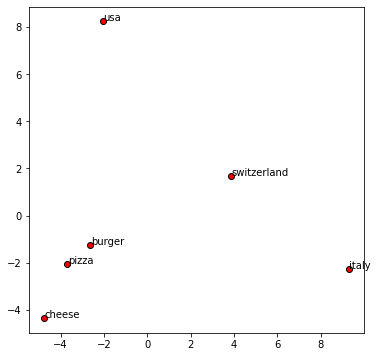

In [197]:
# Please write your Python code below and execute it.
display_scatterplot(wv_text8, words)

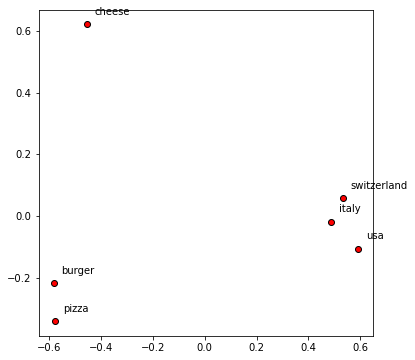

In [198]:
# Please write your Python code below and execute it.
display_scatterplot(wv_model, words)

## End of Lab 6
Please make sure all cells have been executed, save this completed notebook, compress it to a *zip* file, and upload it to [Moodle](https://moodle.msengineering.ch/course/view.php?id=1869).